# Experiment 1. 

I am running the algorithms without introducing additional edges.

In [1]:
import preprocessing as ps
import numpy as np
import networkx as nx
import pickle
import matplotlib.pyplot as plt
import random
random.seed(42)
import csv

In [2]:
# create the project networks
list_1 = [('DM', 'T'), ('DB', 'T'), ('AI', 'T')]
list_2 = [('DM', 'T'), ('DB', 'T'), ('AI', 'T'), ('DM', 'DB'), ('DM', 'AI'), ('DB', 'AI')]
list_3 = [('DM', 'T'), ('DB', 'T'), ('AI', 'DB')]

star_proj = ps.createProjectNetwork(list_1)
full_proj = ps.createProjectNetwork(list_2)
chain_proj = ps.createProjectNetwork(list_3)

## Experiment 1

In this experiment, 
1. I run on samples of the network. (10, 20, 30, 40, 50)
   - First using uniform random sampling.
2. I am using the average sum of adjacent weights as the team influence measure. 

### Uniform Random Sampling

In [3]:
projects = [(star_proj, "Star-Structured Project"), (full_proj, "Fully-connected Structured Project"), (chain_proj, "Chain-Structured Project")]

for i in range(10, 51, 10):
    network = pickle.load(open(f"./networks/subnets/{i}_nodes.pkl", 'rb'))
    print(f">>>>>>>>>>>>>>>>>> {i} Node network <<<<<<<<<<<<<<<<<\n")
    with open(f'./results/exp_1/{i}_node_network.csv', 'w', newline='') as file:
        writer = csv.writer(file)

        for project in projects:
            print(f"*********** {project[1]} ***********")
            writer.writerow([project[1]])
            writer.writerow([])
            # Greedy
            print("\n--------      Using Greedy Strategy     -------\n")
            obj_max_1 = 0.0
            best_set_1 = set()
            for node in network.nodes():
                subset, comm_eff = ps.Greedy(network, project[0], node, beta=None)
                if comm_eff > obj_max_1:
                    obj_max_1 = comm_eff
                    best_set_1 = subset

            leaders_eff_1 = ps.sum_edge_weights(network.subgraph(best_set_1))
            print("Coordinators communication efficiency", leaders_eff_1)
            print(f"Objective value : {obj_max_1}")
            team_eff_1 = obj_max_1 - leaders_eff_1

            for node in best_set_1:
                print(f"Team :{network.nodes[node]['label']}, Node: {node} Rank: {leaders_eff_1}")
            
            title_attributes = f"Node Ranking for {project[1]} Under Greedy Strategy"
            writer.writerow([title_attributes])
            writer.writerow(['Author', "Label", "Rank"])
            for node in best_set_1:
                print(f"Team :{network.nodes[node]['label']}, Node: {node}, Rank: {ps.get_node_rank(network, node)}")
                writer.writerow([node, network.nodes[node]['label'], ps.get_node_rank(network, node)])
            writer.writerow([])

            # Influence Greedy
            print("\n--------      Using influence Greedy Strategy     -------\n")
            obj_max_2 = 0.0
            best_set_2 = set()
            print("Influential First")
            influential_nodes = ps.get_top_ranked_node_each_group(network)
            for node in influential_nodes:
                subset, comm_eff = ps.Greedy(network, project[0], node, beta=None)
                if comm_eff > obj_max_2:
                    obj_max_2 = comm_eff
                    best_set_2 = subset

            leaders_eff_2 = ps.sum_edge_weights(network.subgraph(best_set_2))
            print("Coordinators communication efficiency", leaders_eff_2)
            print(f"Objective value : {obj_max_2}")
            team_eff_2 = obj_max_2 - leaders_eff_2

            writer.writerow([])
            title_attributes = f"Node Ranking for {project[1]} Under Influence Greedy Strategy"
            writer.writerow([title_attributes])
            writer.writerow(['Author', "Label", "Rank"])
            for node in best_set_2:
                print(f"Team :{network.nodes[node]['label']}, Node: {node}, Rank: {ps.get_node_rank(network, node)}")
                writer.writerow([node, network.nodes[node]['label'], ps.get_node_rank(network, node)])
            writer.writerow([])

            writer.writerow([])
            title_attributes = f"Node Ranking for {project[1]} Under Influence Greedy Strategy"
            writer.writerow([title_attributes])
            writer.writerow(['Algorithm', "Objective Function", "Leaders Efficiency", "Team efficiency"])
            writer.writerow(['Greedy', obj_max_1, leaders_eff_1, team_eff_1])
            writer.writerow(['Inf Greedy', obj_max_2, leaders_eff_2, team_eff_2])
            writer.writerow([])

            print("\n\n")

>>>>>>>>>>>>>>>>>> 10 Node network <<<<<<<<<<<<<<<<<

*********** Star-Structured Project ***********

--------      Using Greedy Strategy     -------

Coordinators communication efficiency 27.19
Objective value : 89.65
Team :AI, Node: Gökhan H. Bakir Rank: 27.19
Team :T, Node: Or Meir Rank: 27.19
Team :DB, Node: Matthias Schubert Rank: 27.19
Team :DM, Node: Stefano Lonardi Rank: 27.19
Team :AI, Node: Gökhan H. Bakir, Rank: 7
Team :T, Node: Or Meir, Rank: 1
Team :DB, Node: Matthias Schubert, Rank: 4
Team :DM, Node: Stefano Lonardi, Rank: 6

--------      Using influence Greedy Strategy     -------

Influential First
Coordinators communication efficiency 0.0
Objective value : 45.1
Team :DM, Node: Jun-ichi Takeuchi, Rank: 4
Team :DB, Node: Daniel Gyllstrom, Rank: 2
Team :T, Node: Or Meir, Rank: 1
Team :AI, Node: Greg Hamerly, Rank: 1



*********** Fully-connected Structured Project ***********

--------      Using Greedy Strategy     -------

Coordinators communication efficiency 27.19


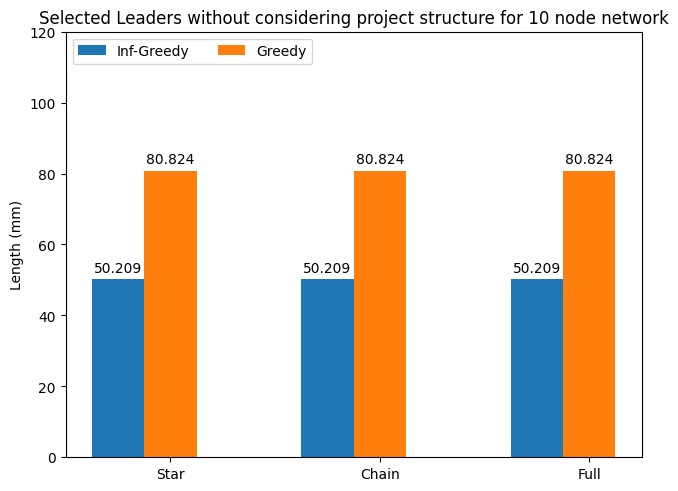

In [4]:
species = ("Star", "Chain", "Full")
penguin_means = {
    'Inf-Greedy': (50.209, 50.209, 50.209),
    'Greedy': (80.824, 80.824, 80.824)
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Selected Leaders without considering project structure for 10 node network')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 120)

plt.show()

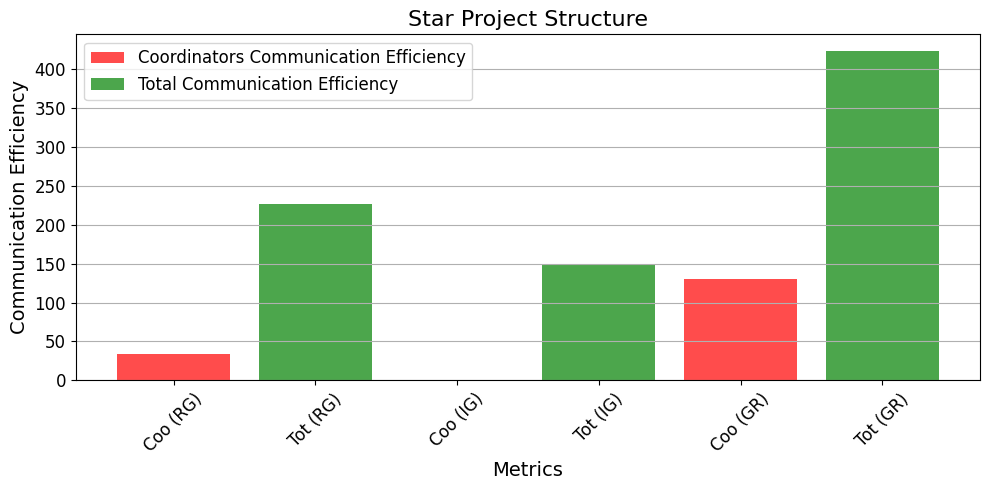

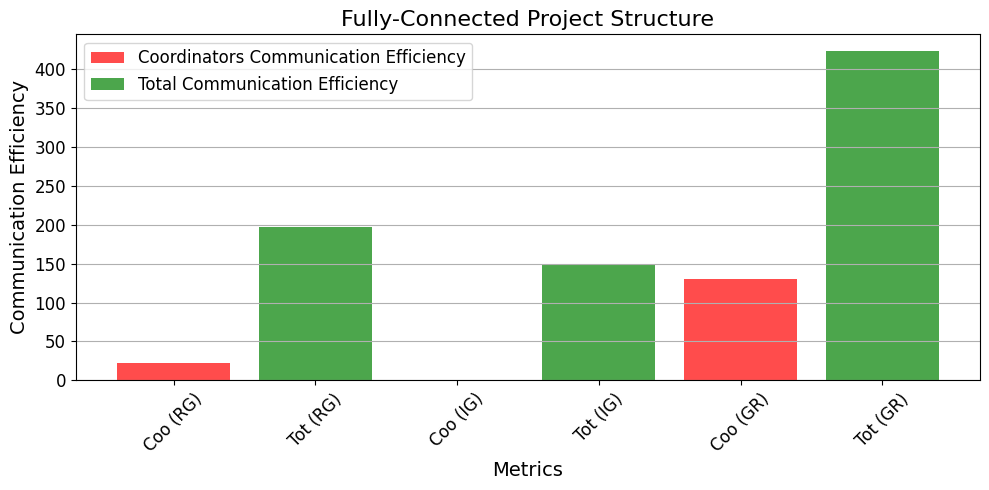

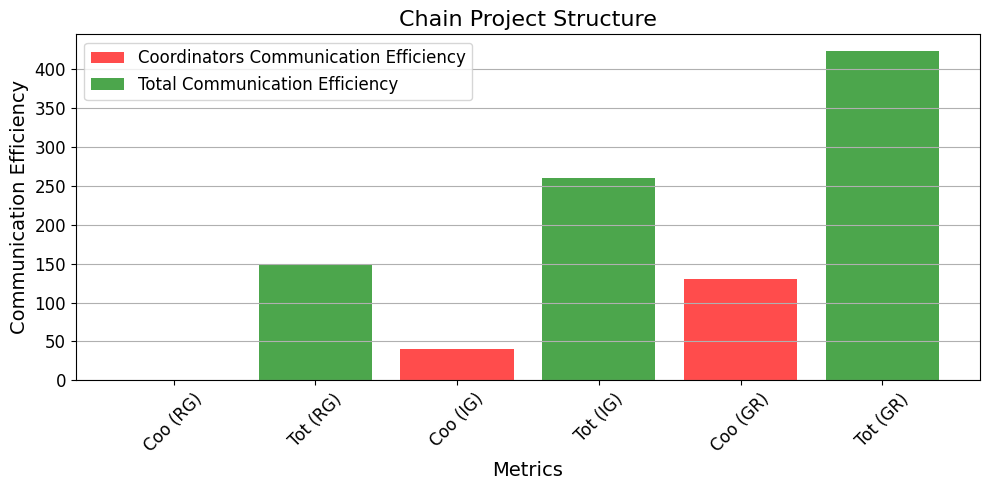

In [5]:
import matplotlib.pyplot as plt

# Data for the plots
data = {
    'Star': {
        'Random Greedy': {
            'Coordinators Communication Efficiency': 33.33,
            'Total Communication Efficiency': 225.9043
        },
        'Influence Greedy': {
            'Coordinators Communication Efficiency': 0,
            'Total Communication Efficiency': 150.0
        },
        'Greedy': {
            'Coordinators communication efficiency': 130.0,
            'Total Communication Efficiency': 423.2008,
        }
    },
    'Fully-Connected': {
        'Random Greedy': {
            'Coordinators Communication Efficiency': 22.220000000000002,
            'Total Communication Efficiency': 196.5813
        },
        'Influence Greedy': {
            'Coordinators Communication Efficiency': 0,
            'Total Communication Efficiency': 150.0
        },
        'Greedy': {
            'Coordinators communication efficiency': 130.0,
            'Total Communication Efficiency': 423.2008,
        }
    },
    'Chain': {
        'Random Greedy': {
            'Coordinators Communication Efficiency': 0,
            'Total Communication Efficiency': 150.0
        },
        'Influence Greedy': {
            'Coordinators Communication Efficiency': 40.0,
            'Total Communication Efficiency': 260.0
        },
        'Greedy': {
            'Coordinators communication efficiency': 130.0,
            'Total Communication Efficiency': 423.2008,
        }
    }
}

# Define abbreviations for the algorithms
abbreviations = {'Random Greedy': 'RG', 'Influence Greedy': 'IG', 'Greedy': 'GR'}

# Plotting
for project, algorithms in data.items():
    plt.figure(figsize=(10, 5))
    plt.title(f'{project} Project Structure', fontsize=16)
    legends_added = False  # Flag to track if legends have been added
    for algorithm, metrics in algorithms.items():
        x = range(len(metrics))
        colors = ['r', 'g']
        abbrev = abbreviations[algorithm]
        for i, (metric, value) in enumerate(metrics.items()):
            color = colors[i] if 'Coordinators' in metric else 'g'
            plt.bar(f'{metric[:3]} ({abbrev})', value, label=metric, color=color, alpha=0.7)
        # Add legend if it hasn't been added before
        if not legends_added:
            plt.legend(fontsize=12)
            legends_added = True  # Set the flag to True after adding legends
    plt.xlabel('Metrics', fontsize=14)
    plt.ylabel('Communication Efficiency', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

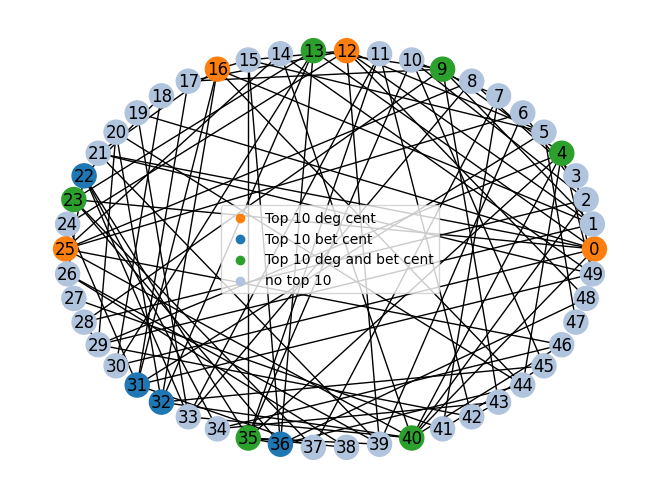

In [6]:
import networkx as nx
from networkx.generators import *
import numpy as np
import matplotlib.pyplot as plt

N_nodes=50
G=fast_gnp_random_graph(N_nodes,p=0.1,seed=0)

#Computing centrality
degCent = nx.degree_centrality(G)

#Descending order sorting centrality
degCent_sorted=dict(sorted(degCent.items(), key=lambda item: item[1],reverse=True))

#Computing betweeness
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)

#Descending order sorting betweeness
betCent_sorted=dict(sorted(betCent.items(), key=lambda item: item[1],reverse=True))

#Color for regular nodes
color_list=N_nodes*['lightsteelblue']

#Getting indices on top 10 nodes for each measure
N_top=10
colors_top_10=['tab:orange','tab:blue','tab:green','lightsteelblue']
keys_deg_top=list(degCent_sorted)[0:N_top]
keys_bet_top=list(betCent_sorted)[0:N_top]

#Computing centrality and betweeness intersection
inter_list=list(set(keys_deg_top) & set(keys_bet_top))

#Setting up color for nodes
for i in inter_list:
  color_list[i]=colors_top_10[2]

for i in range(N_top):
  if keys_deg_top[i] not in inter_list:
    color_list[keys_deg_top[i]]=colors_top_10[0]
  if keys_bet_top[i] not in inter_list:
    color_list[keys_bet_top[i]]=colors_top_10[1]

#Draw graph
pos= nx.circular_layout(G)
nx.draw(G,pos,with_labels=True,node_color=color_list)

#Setting up legend
labels=['Top 10 deg cent','Top 10 bet cent','Top 10 deg and bet cent','no top 10']
for i in range(len(labels)):
  plt.scatter([],[],label=labels[i],color=colors_top_10[i])
plt.legend(loc='center')
plt.show()

## Plotting The Data
